In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [17]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
#utility function
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion')
    print(confusion)
    print('accuracy: {0:4f}, precision:{1:.4f}, recall: {2:.4f},F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블값임. 칼럼위치 -1을 이용해 추출

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =156, stratify = y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(max_iter = 200)
lr_clf.fit(X_train, y_train)
pred=  lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

confusion
[[90 10]
 [21 33]]
accuracy: 0.798701, precision:0.7674, recall: 0.6111,F1: 0.6804, AUC: 0.8454


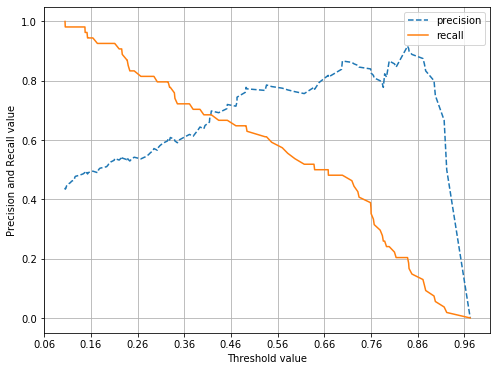

In [29]:
def precision_recall_curve_plot(y_test, pred_proba_c1) :
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    #Threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [30]:
#균형 맞추면 두 개의 지표값이 너무 낮아짐.
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

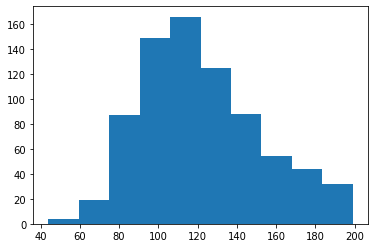

In [31]:
plt.hist(diabetes_data['Glucose'],bins=10)

In [32]:
#min값이 0으로 되어있는 피처에 대해 0값의 전체 데이터 건수 대비 비율 확인
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features :
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [33]:
#0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [34]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

#StandareScaler 이요해 피처 데이터 세트에 일괄적으로 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

confusion
[[90 10]
 [21 33]]
accuracy: 0.798701, precision:0.7674, recall: 0.6111,F1: 0.6804, AUC: 0.8433


In [40]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
confusion
[[67 33]
 [11 43]]
accuracy: 0.714286, precision:0.5658, recall: 0.7963,F1: 0.6615, AUC: 0.8433
임곗값: 0.33
confusion
[[72 28]
 [12 42]]
accuracy: 0.740260, precision:0.6000, recall: 0.7778,F1: 0.6774, AUC: 0.8433
임곗값: 0.36
confusion
[[76 24]
 [15 39]]
accuracy: 0.746753, precision:0.6190, recall: 0.7222,F1: 0.6667, AUC: 0.8433
임곗값: 0.39
confusion
[[78 22]
 [16 38]]
accuracy: 0.753247, precision:0.6333, recall: 0.7037,F1: 0.6667, AUC: 0.8433
임곗값: 0.42
confusion
[[84 16]
 [18 36]]
accuracy: 0.779221, precision:0.6923, recall: 0.6667,F1: 0.6792, AUC: 0.8433
임곗값: 0.45
confusion
[[85 15]
 [18 36]]
accuracy: 0.785714, precision:0.7059, recall: 0.6667,F1: 0.6857, AUC: 0.8433
임곗값: 0.48
confusion
[[88 12]
 [19 35]]
accuracy: 0.798701, precision:0.7447, recall: 0.6481,F1: 0.6931, AUC: 0.8433
임곗값: 0.5
confusion
[[90 10]
 [21 33]]
accuracy: 0.798701, precision:0.7674, recall: 0.6111,F1: 0.6804, AUC: 0.8433


In [42]:
binarizer = Binarizer(threshold= 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

confusion
[[88 12]
 [19 35]]
accuracy: 0.798701, precision:0.7447, recall: 0.6481,F1: 0.6931, AUC: 0.8433
